# [OpenCV-Python Tutorial] Object Tracking

# TODO: Write description!!

In this tutorial, we will understand the concepts of optical flow and its estimation using Lucas-Kanade method.
and we will use functions like `cv2.calcOpticalFlowPyrLK()` to track feature points in a video.

---

In [1]:
import io
import base64
from IPython.display import display, HTML, clear_output
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Helper Functions

# Open Video Controller
# Only support file formats that HTML5 <video> playback supports(mp4, ogg, WebM).
def open_video_controller(fpath, width = 480, height = 360):
    display(HTML(data='''<video alt="test" width="'''+ str(width) + '''" height="''' + str(height) + '''" controls>
            <source src="''' + fpath + '''" type="video/mp4" />
            </video>'''))

def open_video_controller2(fpath, width = 480, height = 360):
    video = io.open(fpath, 'r+b').read()
    encoded = base64.b64encode(video)
    display(HTML(data='''<video alt="test" width="'''+ str(width) + '''" height="''' + str(height) + '''" controls>
            <source src="data:video/mp4;base64,{0}" type="video/mp4" />
            </video>'''.format(encoded.decode('ascii'))))

In [3]:
open_video_controller("images/vtest.mp4")

## 1. Open/Save a Video

(576, 768, 3)


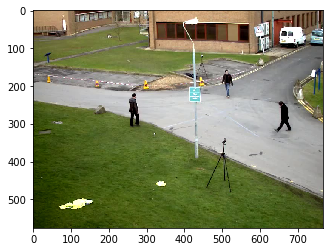

In [10]:
# Open a video with cv2.VideoCapture
vid = cv2.VideoCapture("videos/vtest.mp4")

# Grab a frame
ret, frame = vid.read()
print(frame.shape)
# Video
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
# Get the properties of video using get() method
print("Frame width: %d" % vid.get(cv2.CAP_PROP_FRAME_WIDTH))
print("Frame height: %d" % vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
print("FPS: %d" % vid.get(cv2.CAP_PROP_FPS))

Frame width: 0
Frame height: 0
FPS: 0


In [13]:
# Grab the input device, in this case the webcam
# You can also give path to the video file
vid = cv2.VideoCapture("videos/vtest.mp4")

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print ("Released Video Resource")
            break
        # Convert the image from OpenCV BGR format to matplotlib RGB format
        # to display the image
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # Turn off the axis
        plt.axis('off')
        # Title of the window
        plt.title("Input Stream")
        # Display the frame
        plt.imshow(frame)
        plt.show()
        # Display the frame until new frame is available
        clear_output(wait=True)
except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print ("Released Video Resource")

Released Video Resource


In [16]:
# Open a video and Save 
in_fpath = "videos/vtest.mp4"
v_in = cv2.VideoCapture(in_fpath)

# Define the codec and create VideoWriter object
out_fpath = "videos/vtest_flip.mp4"
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
v_out = cv2.VideoWriter(out_fpath, fourcc, 10.0, (768, 576))

while(v_in.isOpened()):
    # Grab a frame
    ret, frame = v_in.read()
    if ret==True:
        # flip the frame horizontally
        frame = cv2.flip(frame, 1)
        # write the flipped frame
        v_out.write(frame)
    else:
        break

# Release everything if job is finished
v_in.release()
v_out.release()

print('Done!')

Done!


In [17]:
open_video_controller("videos/vtest_flip.mp4")

## 2. Tracking

<TrackerMIL 0x7fc06c4312d0>

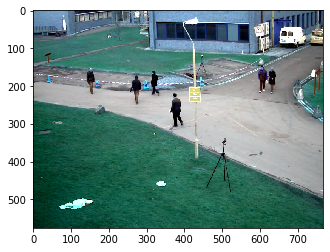

In [ ]:
# Set up tracker.
# Instead of MIL, you can also use
# BOOSTING, KCF, TLD, MEDIANFLOW or GOTURN
#tracker = cv2.Tracker_create("MIL") No funciona en openCV 3.4.2
tracker = cv2.TrackerMIL_create()    # funciona en openCV 3.4.2

vid_fpath = "videos/vtest.mp4"
vid = cv2.VideoCapture(vid_fpath)

# Read first frame.
ok, frame = vid.read()
if not ok:
    print ('Cannot read video file')
    sys.exit()

# Define an initial bounding box
bbox = (495, 155, 40, 80)

# Uncomment the line below to select a different bounding box
# bbox = cv2.selectROI(frame, False)

# Initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

while True:
    # Read a new frame
    ok, frame = vid.read()
    if not ok:
        break

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Draw bounding box
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0,0,255))

    # Display result
#     cv2.imshow("Tracking", frame)
    # Display the frame
    plt.imshow(frame)
    plt.show()
    # Display the frame until new frame is available
    clear_output(wait=True)

# TODO: Write Practice!!!

---

## Practice: Edge Detection

Find edges of the image below using **Canny edge detector**.
- Convert the input image into grayscale.
- You can choose appropriate values of the hysteresys thresholds.
- Set `cmap='gray'` when display using `plt.imshow()`.

Here's the input and a sample output
![Desired output](images/xfiles_result.png)

In [ ]:
# Here's the input image
image = cv2.imread('images/xfiles.jpg', cv2.IMREAD_COLOR)

# Write the code to find edges using cv2.Canny() method.
# ============ YOUR CODE HERE ============
output = np.zeros((360, 480), np.uint8)  # DUMMY
# ========================================

plt.figure(figsize=(8, 3));
plt.subplot(1, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB));
plt.subplot(1, 2, 2); plt.title('Output'); plt.axis('off');
# ======= DISPLAY YOUR OUTPUT HERE =======
plt.imshow(output, cmap='gray');  # DUMMY
# ========================================

---

### Reference

Please see the following official tutorials and blog posts for more detailed explanation.

 - [Getting Started with Videos — OpenCV documentation](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_video_display/py_video_display.html)
 - [OpenCV: Optical Flow](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_lucas_kanade.html)
 - (Blog) [Object Tracking using OpenCV (C++/Python)](https://www.learnopencv.com/object-tracking-using-opencv-cpp-python/)